In [1]:
from __future__ import division, print_function, unicode_literals

#common import
import numpy as np 
import numpy.random as rnd
import os

# to make notebook's output stable across runs
rnd.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 10

#Where to save the figures

PROJECT_ROOT_DIR= "."


def save_fig(fig_id, tight_layout = True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", fig_id + '.png')
    print("figure image" , fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format = 'png', dpi = 300)



In [2]:
"""
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
mnist
"""

'\nfrom tensorflow.examples.tutorials.mnist import input_data\nmnist = input_data.read_data_sets("MNIST_data/", one_hot=True)\nmnist\n'

In [3]:
from sklearn.datasets import fetch_mldata
try:
    mnist = fetch_mldata('MNIST original')
except Exception as ex:        
    from six.moves import urllib
    from scipy.io import loadmat
    import os

    mnist_path = os.path.join(".", "datasets", "mnist-original.mat")

    # download dataset from github.
    mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
    response = urllib.request.urlopen(mnist_alternative_url)
    with open(mnist_path, "wb") as f:
        content = response.read()
        f.write(content)

    mnist_raw = loadmat(mnist_path)
    mnist = {
        "data": mnist_raw["data"].T,
        "target": mnist_raw["label"][0],
        "COL_NAMES": ["label", "data"],
        "DESCR": "mldata.org dataset: mnist-original",
    }
    print("Done!")

Done!


In [4]:
mnist

{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original'}

In [5]:
X,y = mnist['data'],mnist['target']
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

figure image some_digit_plot


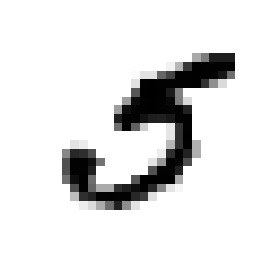

In [7]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")

some_digit_index = 36000
some_digit = X[some_digit_index]
plot_digit(some_digit)
save_fig("some_digit_plot")
plt.show()

In [8]:
y[36000]

5.0

In [9]:
import pandas as pd
example_images = np.r_[X[:12000:600], X[13000:30600:600],X[30600:60000:590]]
print(min(len(example_images),10))
pd.DataFrame(example_images).head()

/home/jacobmjjo/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


10


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#EXTRA
def plot_digits(instances, images_per_row =10, **options):
    size = 28
    images_per_row = min(len(instances),images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis = 0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis('off')


In [11]:
'''
instances = example_images
images_per_row = 10
size = 28
images_per_row = min(len(instances),images_per_row)
images = [instance.reshape(size,size) for instance in instances]
n_rows = (len(instances) - 1) // images_per_row + 1
row_images = []
n_empty = n_rows * images_per_row - len(instances)
images.append(np.zeros((size, size * n_empty)))
for row in range(n_rows):
    rimages = images[row * images_per_row : (row + 1) * images_per_row]
    row_images.append(np.concatenate(row_images, axis=1))
image = np.concatenate(row_images, axis = 0)
'''    
    

'\ninstances = example_images\nimages_per_row = 10\nsize = 28\nimages_per_row = min(len(instances),images_per_row)\nimages = [instance.reshape(size,size) for instance in instances]\nn_rows = (len(instances) - 1) // images_per_row + 1\nrow_images = []\nn_empty = n_rows * images_per_row - len(instances)\nimages.append(np.zeros((size, size * n_empty)))\nfor row in range(n_rows):\n    rimages = images[row * images_per_row : (row + 1) * images_per_row]\n    row_images.append(np.concatenate(row_images, axis=1))\nimage = np.concatenate(row_images, axis = 0)\n'

In [12]:
#image

In [13]:
#pd.Series(rimages)

In [14]:
#pd.Series(row_images)

figure image more_digit_plots


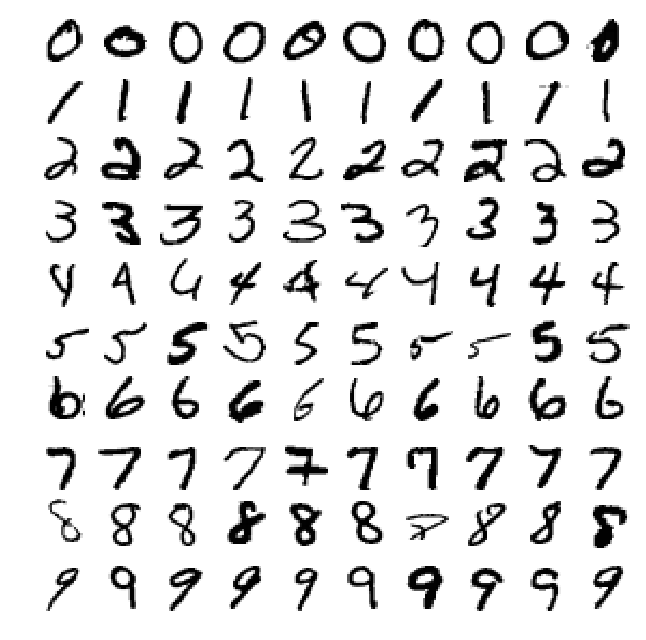

In [15]:
plt.figure(figsize =(9,9))
plot_digits(example_images,images_per_row =10)
save_fig('more_digit_plots')
plt.show()

In [16]:
y[some_digit_index]

5.0

In [17]:
X_train , X_test, y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [18]:
shuffle_index = rnd.permutation(60000)
X_train, y_train = X_train[shuffle_index],y_train[shuffle_index]

In [19]:
y

array([0., 0., 0., ..., 9., 9., 9.])

# Binary Classfier

In [20]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [21]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

/home/jacobmjjo/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [22]:
sgd_clf.predict([some_digit])

array([ True])

In [23]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5, cv = 3,scoring = 'accuracy')

/home/jacobmjjo/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/jacobmjjo/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/jacobmjjo/

array([0.9502 , 0.96565, 0.96495])

In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3,random_state = 42)

for train_index,test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_folds = X_train[test_index]
    y_test_folds = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    print(n_correct/len(y_pred))

/home/jacobmjjo/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9502


/home/jacobmjjo/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.96565


/home/jacobmjjo/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.96495


In [25]:
from sklearn.base import BaseEstimator
class Never5classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1), dtype=bool)
    

In [26]:
never_5_clf = Never5classifier()
cross_val_score(never_5_clf,X_train,y_train_5,cv = 3,scoring='accuracy')

array([0.909  , 0.90715, 0.9128 ])

In [27]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5, cv = 3)
y_train_pred

/home/jacobmjjo/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/jacobmjjo/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/jacobmjjo/

array([False, False, False, ..., False, False, False])

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[53272,  1307],
       [ 1077,  4344]])

In [29]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5,y_train_pred)

0.7687135020350381

In [30]:
recall_score(y_train_5,y_train_pred)

0.801328168234643

In [31]:
4334/(4334+1337)

0.764239111267854

In [32]:
4334/(4334+1087)

0.7994834901309722

In [33]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7846820809248555

In [34]:
4334/(4334 + (1337+1087)/2)

0.7814641182834475

In [35]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([161855.74572176])

In [36]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [37]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [38]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5, cv = 3,method = "decision_function")

/home/jacobmjjo/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/jacobmjjo/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/jacobmjjo/

In [39]:
y_scores

array([ -434076.49813641, -1825667.15281624,  -767086.76186905, ...,
        -867191.25267994,  -565357.11420164,  -366599.16018198])

In [40]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5,y_scores)

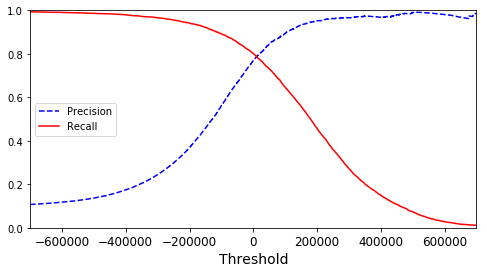

In [41]:
def plot_precision_vs_threshold(precisions,recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label = "Precision")
    plt.plot(thresholds, recalls[:-1], "r-", label = 'Recall')
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0, 1])
plt.figure(figsize = (8, 4))    
plt.xlim([-700000,700000])
plot_precision_vs_threshold(precisions,recalls, thresholds)
plt.show()

In [42]:
(y_train_pred == (y_scores > 0)).all()

True

In [43]:
y_train_pred90 = (y_scores > 70000)

In [44]:
precision_score(y_train_5,y_train_pred90)

0.8659205116491548

In [45]:
recall_score(y_train_5, y_train_pred90)

0.6993174691016417

figure image Precisions vs recalls


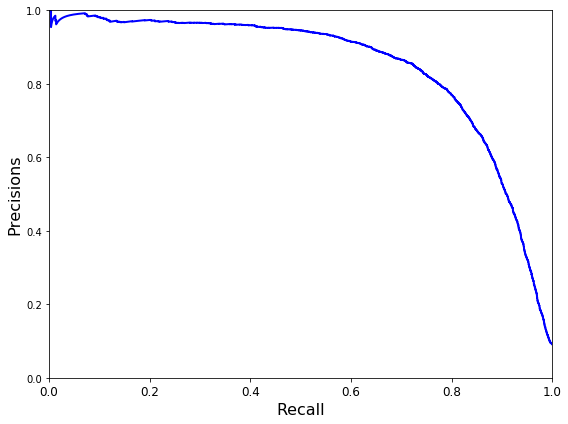

In [46]:
def plot_precisions_vs_recalls(precisions,recalls):
    plt.plot(recalls, precisions, 'b-', linewidth = 2)
    plt.xlabel("Recall", fontsize = 16)
    plt.ylabel("Precisions", fontsize = 16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize = (8,6))
plot_precisions_vs_recalls(precisions,recalls)
save_fig('Precisions vs recalls')
plt.show()

# ROC curves

In [47]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

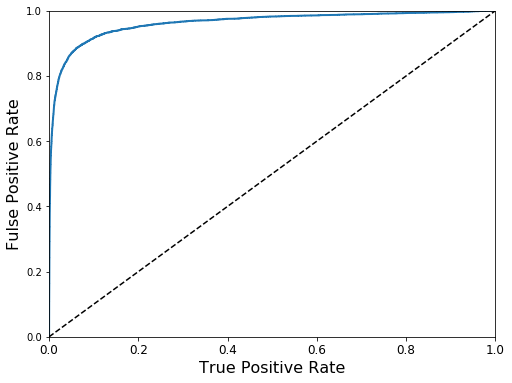

In [48]:
def plot_roc_curves(fpr,tpr, **options):
    plt.plot(fpr,tpr,linewidth = 2,**options)
    plt.plot([0, 1],[0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('True Positive Rate', fontsize = 16)
    plt.ylabel('Fulse Positive Rate', fontsize = 16)

plt.figure(figsize = (8,6))
plot_roc_curves(fpr,tpr)
plt.show()

In [49]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5,y_scores)

0.9624496555967155

/home/jacobmjjo/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:641: UserWarning: Unrecognized location "lower rigth". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


figure image roc_curve_comparison_plot


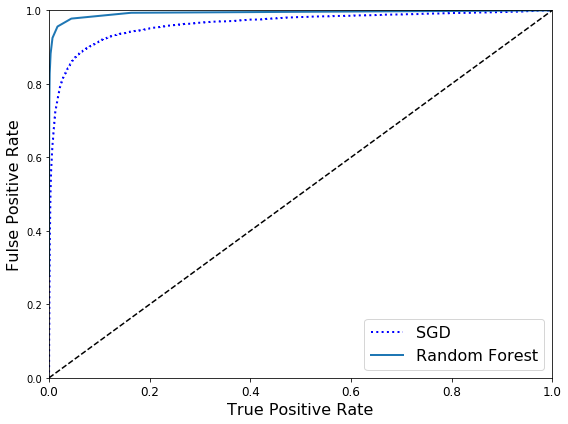

In [50]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5, cv = 3 ,method = 'predict_proba')
y_scores_forest = y_probas_forest[:, 1] 
fpr_forest,tpr_forest,thresholds_forest = roc_curve(y_train_5, y_scores_forest)

plt.figure(figsize =(8,6))
plt.plot(fpr,tpr,"b:",linewidth = 2, label = "SGD")
plot_roc_curves(fpr_forest, tpr_forest, label="Random Forest")
plt.legend(loc="lower rigth", fontsize = 16)
save_fig("roc_curve_comparison_plot")
plt.show()

In [51]:
roc_auc_score(y_train_5,y_scores_forest)

0.9931243366003829

In [52]:
y_train_pred_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=3)
roc_auc_score(y_train_5,y_train_pred_forest)

0.913516445087802

In [53]:
precision_score(y_train_5,y_train_pred_forest)

0.9852973447443494

In [54]:
recall_score(y_train_5,y_train_pred_forest)

0.8282604685482383

# Multiclass classification

In [55]:
sgd_clf.fit(X_train,y_train) # y_train, not y_train_5
sgd_clf.predict([some_digit])

/home/jacobmjjo/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([5.])

In [56]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-311402.62954431, -363517.28355739, -446449.5306454 ,
        -183226.61023518, -414337.15339485,  161855.74572176,
        -452576.39616343, -471957.14962573, -518542.33997148,
        -536774.63961222]])

In [57]:
np.argmax(some_digit_scores)

5

In [58]:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [59]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state = 42))
ovo_clf.fit(X_train,y_train)
ovo_clf.predict([some_digit])

/home/jacobmjjo/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/jacobmjjo/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/jacobmjjo/

/home/jacobmjjo/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/jacobmjjo/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/jacobmjjo/

/home/jacobmjjo/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/jacobmjjo/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/jacobmjjo/

array([5.])

In [60]:
len(ovo_clf.estimators_)

45

In [61]:
forest_clf.fit(X_train,y_train)
forest_clf.predict([some_digit])

array([5.])

In [62]:
forest_clf.predict_proba([some_digit])

array([[0.1, 0. , 0. , 0.1, 0. , 0.8, 0. , 0. , 0. , 0. ]])

In [63]:
cross_val_score(sgd_clf,X_train,y_train,cv = 3)

/home/jacobmjjo/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/jacobmjjo/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/jacobmjjo/

array([0.84063187, 0.84899245, 0.86652998])

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf,X_train_scaled,y_train,cv = 3, scoring = "accuracy")

/home/jacobmjjo/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/jacobmjjo/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/jacobmjjo/

array([0.91011798, 0.90874544, 0.906636  ])

In [65]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled,y_train,cv = 3)
conf_mx = confusion_matrix(y_train,y_train_pred)
conf_mx

/home/jacobmjjo/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/jacobmjjo/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/jacobmjjo/

array([[5725,    3,   24,    9,   10,   49,   50,   10,   39,    4],
       [   2, 6493,   43,   25,    7,   40,    5,   10,  109,    8],
       [  51,   41, 5321,  104,   89,   26,   87,   60,  166,   13],
       [  47,   46,  141, 5342,    1,  231,   40,   50,  141,   92],
       [  19,   29,   41,   10, 5366,    9,   56,   37,   86,  189],
       [  73,   45,   36,  193,   64, 4582,  111,   30,  193,   94],
       [  29,   34,   44,    2,   42,   85, 5627,   10,   45,    0],
       [  25,   24,   74,   32,   54,   12,    6, 5787,   15,  236],
       [  52,  161,   73,  156,   10,  163,   61,   25, 5027,  123],
       [  43,   35,   26,   92,  178,   28,    2,  223,   82, 5240]])

figure image confusion_matrix_plot


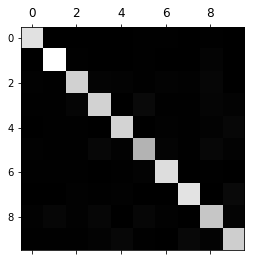

In [66]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a color bar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add.subplot(111)
    cax = ax.matshow(conf_mx)
    fig.colorbar(cax)

plt.matshow(conf_mx, cmap =plt.cm.gray)
save_fig("confusion_matrix_plot",tight_layout = False)
plt.show()

figure image confusion_matrix_errors_plot


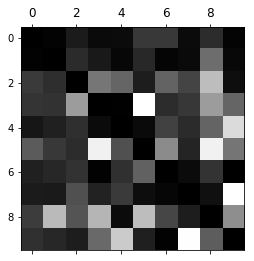

In [67]:
row_sum = conf_mx.sum(axis = 1,keepdims = True)
norm_conf_mx = conf_mx / row_sum
np.fill_diagonal(norm_conf_mx, 0 )
plt.matshow(norm_conf_mx,cmap = plt.cm.gray)
save_fig("confusion_matrix_errors_plot",tight_layout = False)
plt.show()

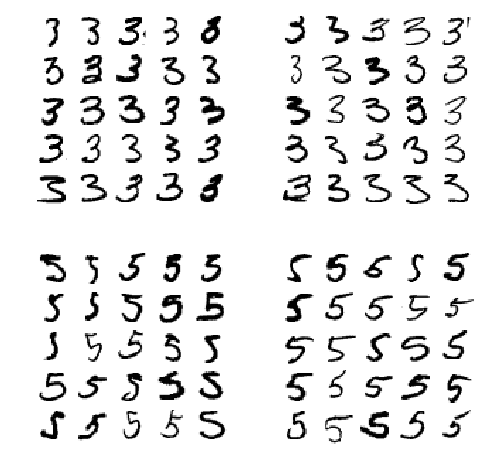

In [68]:
cl_a, cl_b = 3,5
X_aa = X_train[(y_train == cl_a)&(y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a)&(y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b)&(y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b)&(y_train_pred == cl_b)]

plt.figure(figsize = (8,8))
plt.subplot(221)
plot_digits(X_aa[:25],images_per_row = 5)
plt.subplot(222)
plot_digits(X_ab[:25],images_per_row = 5)
plt.subplot(223)
plot_digits(X_ba[:25],images_per_row = 5)
plt.subplot(224)
plot_digits(X_bb[:25],images_per_row = 5)
plt.show()

# Multiabel Classification

In [69]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train%2 == 1)
y_multilabel = np.c_[y_train_large,y_train_odd]

knn_clf = KNeighborsClassifier(n_jobs=-1)
knn_clf.fit(X_train,y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')

In [70]:
y_multilabel.shape

(60000, 2)

In [71]:
y_train_large.shape

(60000,)

In [72]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [73]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train,y_multilabel,cv = 3,n_jobs = -1)

In [74]:
f1_score(y_multilabel,y_train_knn_pred,average ='macro')

0.97709078477525

## Multioutput Classification

In [75]:
noise = rnd.randint(0,100, size = (len(X_train),28**2))
X_train_mod = X_train + noise
noise = rnd.randint(0,100, size=(len(X_test),28**2))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

figure image noisy_digit_example_plot


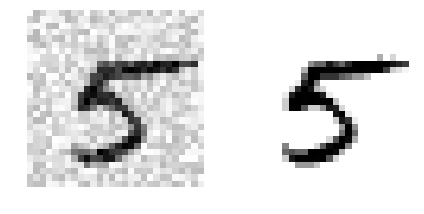

In [76]:
some_index = 5500
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
save_fig("noisy_digit_example_plot")
plt.show()

In [77]:
knn_clf.fit(X_train_mod,y_train_mod)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')

figure image clean_digit_example_plot


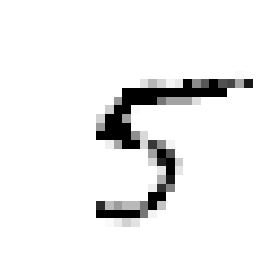

In [78]:
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)
save_fig("clean_digit_example_plot")
plt.show()

## Extra material

## Dummy (ie. random) classifier

In [79]:
from sklearn.dummy import DummyClassifier
dmy_clf = DummyClassifier()
y_probas_dummy = cross_val_predict(dmy_clf,X_train,y_train_5,method='predict_proba')
y_scores_dummy = y_probas_dummy[:,1]

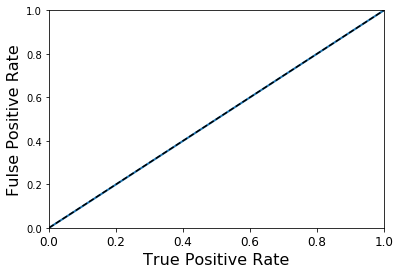

In [80]:
fprr,tprr,thresholdsr = roc_curve(y_train_5,y_scores_dummy)
plot_roc_curves(fprr, tprr, label="Dummy")

## KNN classifier

In [81]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier( weights='distance', n_neighbors=4,n_jobs = -1)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='distance')

In [82]:
y_knn_pred = knn_clf.predict(X_test)

In [83]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_knn_pred)

0.9714

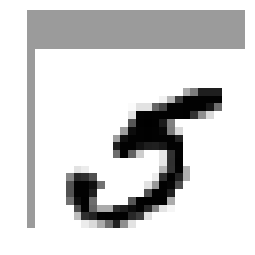

In [84]:
from scipy.ndimage.interpolation import shift
def shift_digit(digit_array, dx, dy, new = 0):
    return shift(digit_array.reshape(28,28),[dx,dy], cval = new).reshape(784)

plot_digit(shift_digit(some_digit, 5, 1,new = 100))

In [85]:
X_train_expanded = [X_train]
y_train_expanded = [y_train]
for dx,dy in ((1,0),(-1,0),(0,1),(0,-1)):
    shifted_images = np.apply_along_axis(shift_digit,axis = 1,arr = X_train, dx=dx,dy=dy)
    X_train_expanded.append(shifted_images)
    y_train_expanded.append(y_train)
    
X_train_expanded = np.concatenate(X_train_expanded)
y_train_expanded = np.concatenate(y_train_expanded)
X_train_expanded.shape, y_train_expanded.shape

((300000, 784), (300000,))

In [86]:
knn_clf.fit(X_train_expanded,y_train_expanded)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='distance')

In [87]:
y_knn_expanded_pred = knn_clf.predict(X_test)

In [88]:
accuracy_score(y_test, y_knn_expanded_pred)

0.9763

In [89]:
ambiguous_digit = X_test[2589]
knn_clf.predict_proba([ambiguous_digit])

array([[0.       , 0.       , 0.5053645, 0.       , 0.       , 0.       ,
        0.       , 0.4946355, 0.       , 0.       ]])

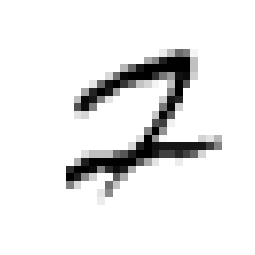

In [90]:
plot_digit(ambiguous_digit)

# Exercise solutions

1.Try to build a classifier for the MNIST dataset that achieves over 97% accuracy on the test set.Hint: the KNeighborsClassifier works quite well for this task; you just need to find good hyperparameter values (try a gird search on the weitghts and n_neighbors hyperparameters).

In [91]:

from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3, n_jobs=-1)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] n_neighbors=3, weights=uniform ..................................
[CV] n_neighbors=3, weights=uniform ..................................
[CV] n_neighbors=3, weights=uniform ..................................
[CV] n_neighbors=3, weights=uniform ..................................
[CV] n_neighbors=3, weights=uniform ..................................
[CV] n_neighbors=3, weights=distance .................................
[CV] n_neighbors=3, weights=distance .................................
[CV] n_neighbors=3, weights=distance .................................
[CV] n_neighbors=3, weights=distance .................................
[CV] n_neighbors=3, weights=distance .................................
[CV] n_neighbors=4, weights=uniform ..................................
[CV] n_neighbors=4, weights=uniform ..................................
[CV]  n_neighbors=3, weights=uniform, score=0.9714214297617064, total=47.5min
[CV] n_nei

[Parallel(n_jobs=-1)]: Done   4 out of  20 | elapsed: 233.8min remaining: 935.0min


[CV] n_neighbors=4, weights=distance .................................
[CV]  n_neighbors=3, weights=uniform, score=0.9728265399683255, total=47.7min
[CV] n_neighbors=4, weights=distance .................................
[CV]  n_neighbors=3, weights=uniform, score=0.9726666666666667, total=47.9min
[CV] n_neighbors=4, weights=distance .................................
[CV] .... n_neighbors=3, weights=distance, score=0.9745, total=48.0min
[CV] n_neighbors=4, weights=distance .................................
[CV]  n_neighbors=3, weights=distance, score=0.9725879020163306, total=48.0min
[CV]  n_neighbors=3, weights=distance, score=0.9743269150620989, total=48.0min
[CV]  n_neighbors=3, weights=uniform, score=0.9717405801933978, total=47.7min


[Parallel(n_jobs=-1)]: Done  11 out of  20 | elapsed: 234.2min remaining: 191.6min


[CV]  n_neighbors=3, weights=distance, score=0.9724074691563854, total=47.7min
[CV]  n_neighbors=4, weights=distance, score=0.9729211798033661, total=31.1min
[CV]  n_neighbors=4, weights=distance, score=0.9745833333333334, total=30.5min
[CV]  n_neighbors=4, weights=distance, score=0.9720740246748917, total=29.7min
[CV]  n_neighbors=4, weights=distance, score=0.9714285714285714, total=31.7min
[CV]  n_neighbors=4, weights=uniform, score=0.9680726908969657, total=30.9min
[CV]  n_neighbors=4, weights=uniform, score=0.9718333333333333, total=31.8min


[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed: 384.6min remaining: 42.7min


[CV]  n_neighbors=4, weights=distance, score=0.9752438109527382, total=29.9min
[CV]  n_neighbors=4, weights=uniform, score=0.9709093940151705, total=31.6min


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 385.0min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'weights': ['uniform', 'distance'], 'n_neighbors': [3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [92]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [93]:
grid_search.best_score_

0.97325

In [94]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.9714

# 2.
Write a function that can shift an MNIST image in any direction (left, rigth, up, or down) by one pixel. Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set. You should observe that your model performs even better now! This technique of artificially growing the training set is called `data augmentation` or `training set expansion.`

In [95]:
from scipy.ndimage.interpolation import shift

In [96]:
def shift_image(image,dx,dy):
    image = image.reshape((28,28))
    shifted_image = shift(image, [dy,dx], cval = 0, mode = 'constant')
    return shifted_image.reshape([-1])

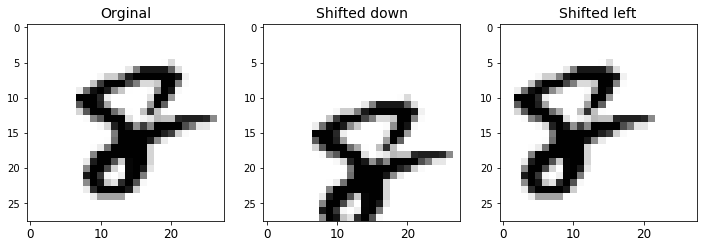

In [97]:
image = X_train[1000]
shifted_image_down = shift_image(image,0,5)
shifted_image_left = shift_image(image,-5,0)
plt.figure(figsize = (12,8))
plt.subplot(131)
plt.title("Orginal",fontsize = 14)
plt.imshow(image.reshape(28,28),interpolation = "nearest", cmap = "Greys")
plt.subplot(132)
plt.title("Shifted down",fontsize=14)
plt.imshow(shifted_image_down.reshape(28,28),interpolation = "nearest", cmap = "Greys")
plt.subplot(133)
plt.title("Shifted left",fontsize=14)
plt.imshow(shifted_image_left.reshape(28,28),interpolation = "nearest", cmap = "Greys")
plt.show()

In [98]:
X_trained_augmented = [image for image in X_train]
y_trained_augmented = [label for label in y_train]

for dx,dy in ((1,0),(-1,0),(0,1),(0,-1)):
    for image,label in zip(X_train,y_train):
        X_trained_augmented.append(shift_image(image,dx,dy))
        y_trained_augmented.append(label)
        
X_train_augmented = np.array(X_trained_augmented)
y_train_augmented = np.array(y_trained_augmented)

In [99]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [100]:
knn_clf = KNeighborsClassifier(**grid_search.best_params_)

In [101]:
knn_clf.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='distance')

In [2]:
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

NameError: name 'knn_clf' is not defined

# 4.spam classifier


In [5]:
import os
import tarfile
from six.moves import urllib
DOWNLOAD_ROOT= "http://spamassassin.apache.org/old/publiccorpus/" #download examples of spam and ham from Apache SpamAssassins
HAM_URL = DOWNLOAD_ROOT + "20030228_easy_ham.tar.bz2"
SPAM_URL = DOWNLOAD_ROOT + "20030228_spam.tar.bz2"
SPAM_PATH = os.path.join("datasets","spam")

def fetch_spam_data(spam_url = SPAM_URL,spam_path=SPAM_PATH):
    if not os.path.isdir(spam_path):
        os.makedirs(spam_path)
    for filename, url in (("ham.tar.bz2", HAM_URL),("spam.tar.bz2",SPAM_URL)):
        path = os.path.join(spam_path,filename)
        if not os.path.isfile(path):
            urllib.request.urlretrieve(url,path)
        tar_bz2_file = tarfile.open(path)
        tar_bz2_file.extractall(path=SPAM_PATH)
        tar_bz2_file.close()

In [6]:
fetch_spam_data()

In [7]:
HAM_DIR = os.path.join(SPAM_PATH, "easy_ham")
SPAM_DIR = os.path.join(SPAM_PATH, "spam")
ham_filenames = [name for name in sorted(os.listdir(HAM_DIR)) if len(name) > 20]
spam_filenames = [name for name in sorted(os.listdir(SPAM_DIR)) if len(name) > 20]


In [8]:
len(ham_filenames)

2500

In [9]:
len(spam_filenames)

500

We can use python's `email` module to parse these emails(this handles headers, encoding, and so on)

메일들을 분석하기 위해 파이썬의 `email`모듈을 사용 할수 있습니다.

In [10]:
import email
import email.policy
import email.parser

def load_email(is_spam, filename, spam_path=SPAM_PATH):
    directory = "spam" if is_spam else "easy_ham"
    with open(os.path.join(spam_path, directory, filename), "rb") as f:
        return email.parser.BytesParser(policy=email.policy.default).parse(f)

In [11]:
ham_emails = [load_email(is_spam=False, filename=name) for name in ham_filenames]
spam_emails = [load_email(is_spam=True, filename=name) for name in spam_filenames]

In [12]:
print(ham_emails[3].get_content().strip())

Klez: The Virus That Won't Die
 
Already the most prolific virus ever, Klez continues to wreak havoc.

Andrew Brandt
>>From the September 2002 issue of PC World magazine
Posted Thursday, August 01, 2002


The Klez worm is approaching its seventh month of wriggling across 
the Web, making it one of the most persistent viruses ever. And 
experts warn that it may be a harbinger of new viruses that use a 
combination of pernicious approaches to go from PC to PC.

Antivirus software makers Symantec and McAfee both report more than 
2000 new infections daily, with no sign of letup at press time. The 
British security firm MessageLabs estimates that 1 in every 300 
e-mail messages holds a variation of the Klez virus, and says that 
Klez has already surpassed last summer's SirCam as the most prolific 
virus ever.

And some newer Klez variants aren't merely nuisances--they can carry 
other viruses in them that corrupt your data.

...

http://www.pcworld.com/news/article/0,aid,103259,00.asp
____

In [13]:
print(spam_emails[3].get_content().strip())

##################################################
#                                                #
#                 Adult Club                     #
#           Offers FREE Membership               #
#                                                #
##################################################

>>>>>  INSTANT ACCESS TO ALL SITES NOW
>>>>>  Your User Name And Password is.
>>>>>  User Name: zzzz@spamassassin.taint.org
>>>>>  Password: 760382

5 of the Best Adult Sites on the Internet for FREE!
---------------------------------------
NEWS 08/18/02
With just over 2.9 Million Members that signed up for FREE, Last month there were 721,184 New
Members. Are you one of them yet???
---------------------------------------
Our Membership FAQ

Q. Why are you offering free access to 5 adult membership sites for free?
A. I have advertisers that pay me for ad space so you don't have to pay for membership.

Q. Is it true my membership is for life?
A. Absolutely you'll never have to pay a cen

In [14]:
def get_email_structure(email):
    if isinstance(email,str):
        return email
    payload = email.get_payload()
    if isinstance(payload,list):
        return "multipart({})".format(", ".join([
            get_email_structure(sub_email)
            for sub_email in payload
        ]))
    else:
        return email.get_content_type()

In [15]:
from collections import Counter

def structures_counter(emails):
    structures = Counter()
    for email in emails:
        structure = get_email_structure(email)
        structures[structure]+=1
    return structures

In [16]:
structures_counter(ham_emails).most_common()

[('text/plain', 2408),
 ('multipart(text/plain, application/pgp-signature)', 66),
 ('multipart(text/plain, text/html)', 8),
 ('multipart(text/plain, text/plain)', 4),
 ('multipart(text/plain)', 3),
 ('multipart(text/plain, application/octet-stream)', 2),
 ('multipart(text/plain, text/enriched)', 1),
 ('multipart(text/plain, application/ms-tnef, text/plain)', 1),
 ('multipart(multipart(text/plain, text/plain, text/plain), application/pgp-signature)',
  1),
 ('multipart(text/plain, video/mng)', 1),
 ('multipart(text/plain, multipart(text/plain))', 1),
 ('multipart(text/plain, application/x-pkcs7-signature)', 1),
 ('multipart(text/plain, multipart(text/plain, text/plain), text/rfc822-headers)',
  1),
 ('multipart(text/plain, multipart(text/plain, text/plain), multipart(multipart(text/plain, application/x-pkcs7-signature)))',
  1),
 ('multipart(text/plain, application/x-java-applet)', 1)]

In [17]:
structures_counter(spam_emails).most_common()

[('text/plain', 218),
 ('text/html', 183),
 ('multipart(text/plain, text/html)', 45),
 ('multipart(text/html)', 20),
 ('multipart(text/plain)', 19),
 ('multipart(multipart(text/html))', 5),
 ('multipart(text/plain, image/jpeg)', 3),
 ('multipart(text/html, application/octet-stream)', 2),
 ('multipart(text/plain, application/octet-stream)', 1),
 ('multipart(text/html, text/plain)', 1),
 ('multipart(multipart(text/html), application/octet-stream, image/jpeg)', 1),
 ('multipart(multipart(text/plain, text/html), image/gif)', 1),
 ('multipart/alternative', 1)]

분석을 보면 일반 메일은 text/plain을 많이 사용하는 방면 스팸은 html이 많이 사용합니다. 또한 일반 메일은 pgp가 사용되는 것이 표시 되었는데 스팸은 pgp사용이 보이지 않습니다.여기서 얻은 정보가 큰 도움이 될 듯 합니다.

In [18]:
for header , value in spam_emails[0].items():
    print(header,":",value)

Return-Path : <12a1mailbot1@web.de>
Delivered-To : zzzz@localhost.spamassassin.taint.org
Received : from localhost (localhost [127.0.0.1])	by phobos.labs.spamassassin.taint.org (Postfix) with ESMTP id 136B943C32	for <zzzz@localhost>; Thu, 22 Aug 2002 08:17:21 -0400 (EDT)
Received : from mail.webnote.net [193.120.211.219]	by localhost with POP3 (fetchmail-5.9.0)	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 13:17:21 +0100 (IST)
Received : from dd_it7 ([210.97.77.167])	by webnote.net (8.9.3/8.9.3) with ESMTP id NAA04623	for <zzzz@spamassassin.taint.org>; Thu, 22 Aug 2002 13:09:41 +0100
From : 12a1mailbot1@web.de
Received : from r-smtp.korea.com - 203.122.2.197 by dd_it7  with Microsoft SMTPSVC(5.5.1775.675.6);	 Sat, 24 Aug 2002 09:42:10 +0900
To : dcek1a1@netsgo.com
Subject : Life Insurance - Why Pay More?
Date : Wed, 21 Aug 2002 20:31:57 -1600
MIME-Version : 1.0
Message-ID : <0103c1042001882DD_IT7@dd_it7>
Content-Type : text/html; charset="iso-8859-1"
Content-Transfer-Encoding : qu

여기에는 중요한 정보(메일 주소나 localhost 주소 등)들이 많이 내포하고 있습니다.우리가 여기서 중점적으로 둘 정보는 `Subject`로 하겠습니다.

In [19]:
spam_emails[0]['Subject']

'Life Insurance - Why Pay More?'

자, 그럼 여기서 너무 많은 데이터에 관한 공부를 했지만 test.set과 train.set을 나누는 것을 잊지 맙시다.

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.array(ham_emails + spam_emails)
y = np.array([0] * len(ham_emails) + [1] * len(spam_emails))# 일반메일은 0 스팸은 1로해서 data를 만든다



In [21]:
import pandas as pd

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

/home/jacobmjjo/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/jacobmjjo/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


그럼,이제 함수를 써 봅시다. 첫번째롤 HTML을 일반텍스트로 변환해야 합니다.대체로 가장 좋은 방법은 [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/)라이브러리를 사용하는 방법인데요 여기서는 다른 종속성을 추가하는 것을 피하도록 할게요.정규식을 이용해서 지저분하지만 빠른 해결책을 만들어 볼게요( [un̨ho͞ly radiańcé destro҉ying all enli̍̈́̂̈́ghtenment](https://stackoverflow.com/a/1732454/38626)여기에 리스크가 있다는 저도 무슨내용인지 모르겠네요;;;). 이 함수에 의하면 처음에는 `<head>` 부분을 빼고 모든`<a>` 태그를 하이퍼 링크로 변환합니다.그리고 모든 HTML 태그를 지웁니다 오직 일반텍스트만 남을수 있게 하기위해서요.
가독성을 위해 여러줄을 한 줄 씩 재배치 하고 마지막으로 `&gt;` 나 `&nbsp;`같은 html 엔티티를 unescapes로 표현합니다


In [22]:
import re
from html import unescape

def html_to_plain_text(html):
    text = re.sub('<head.*?>.*?</head>', '', html, flags=re.M | re.S | re.I)
    text = re.sub('<a\s.*?>', ' HYPERLINK ', text, flags=re.M | re.S | re.I)
    text = re.sub('<.*?>', '', text, flags=re.M | re.S)
    text = re.sub(r'(\s*\n)+', '\n', text, flags=re.M | re.S)
    return unescape(text)

잘 작동하는지 함 볼까요? html 스팸메일로 시도해 봅시다.

In [23]:
html_spam_emails = [email for email in X_train[y_train==1]
                   if get_email_structure(email) == "text/html"]
sample_html_spam = html_spam_emails[7]
print(sample_html_spam.get_content().strip()[:1000], "...")

<HTML><HEAD><TITLE></TITLE><META http-equiv="Content-Type" content="text/html; charset=windows-1252"><STYLE>A:link {TEX-DECORATION: none}A:active {TEXT-DECORATION: none}A:visited {TEXT-DECORATION: none}A:hover {COLOR: #0033ff; TEXT-DECORATION: underline}</STYLE><META content="MSHTML 6.00.2713.1100" name="GENERATOR"></HEAD>
<BODY text="#000000" vLink="#0033ff" link="#0033ff" bgColor="#CCCC99"><TABLE borderColor="#660000" cellSpacing="0" cellPadding="0" border="0" width="100%"><TR><TD bgColor="#CCCC99" valign="top" colspan="2" height="27">
<font size="6" face="Arial, Helvetica, sans-serif" color="#660000">
<b>OTC</b></font></TD></TR><TR><TD height="2" bgcolor="#6a694f">
<font size="5" face="Times New Roman, Times, serif" color="#FFFFFF">
<b>&nbsp;Newsletter</b></font></TD><TD height="2" bgcolor="#6a694f"><div align="right"><font color="#FFFFFF">
<b>Discover Tomorrow's Winners&nbsp;</b></font></div></TD></TR><TR><TD height="25" colspan="2" bgcolor="#CCCC99"><table width="100%" border="0" 

In [24]:
print(html_to_plain_text(sample_html_spam.get_content())[:1000],"...")


OTC
 Newsletter
Discover Tomorrow's Winners 
For Immediate Release
Cal-Bay (Stock Symbol: CBYI)
Watch for analyst "Strong Buy Recommendations" and several advisory newsletters picking CBYI.  CBYI has filed to be traded on the OTCBB, share prices historically INCREASE when companies get listed on this larger trading exchange. CBYI is trading around 25 cents and should skyrocket to $2.66 - $3.25 a share in the near future.
Put CBYI on your watch list, acquire a position TODAY.
REASONS TO INVEST IN CBYI
A profitable company and is on track to beat ALL earnings estimates!
One of the FASTEST growing distributors in environmental & safety equipment instruments.
Excellent management team, several EXCLUSIVE contracts.  IMPRESSIVE client list including the U.S. Air Force, Anheuser-Busch, Chevron Refining and Mitsubishi Heavy Industries, GE-Energy & Environmental Research.
RAPIDLY GROWING INDUSTRY
Industry revenues exceed $900 million, estimates indicate that there could be as much as $25 billi

잘 하셨습니다! 그러면 이제 무슨 형태이든 이메일을 입력하면 일반 텍스트 형태로 나오는 함수로 만들어 보겠습니다.

In [25]:
def email_to_text(email):
    html = None
    for part in email.walk():
        ctype = part.get_content_type()
        if not ctype in ("text/plain","text/html"):
            countinue
        try:
            content = part.get_content()
        except:
            content = str(part.get_payload())
        if ctype == "text/plain":
            return content
        else:
            html = content
            
    if html:
        return html_to_plain_text(html)

In [26]:
print(email_to_text(sample_html_spam),"...")


OTC
 Newsletter
Discover Tomorrow's Winners 
For Immediate Release
Cal-Bay (Stock Symbol: CBYI)
Watch for analyst "Strong Buy Recommendations" and several advisory newsletters picking CBYI.  CBYI has filed to be traded on the OTCBB, share prices historically INCREASE when companies get listed on this larger trading exchange. CBYI is trading around 25 cents and should skyrocket to $2.66 - $3.25 a share in the near future.
Put CBYI on your watch list, acquire a position TODAY.
REASONS TO INVEST IN CBYI
A profitable company and is on track to beat ALL earnings estimates!
One of the FASTEST growing distributors in environmental & safety equipment instruments.
Excellent management team, several EXCLUSIVE contracts.  IMPRESSIVE client list including the U.S. Air Force, Anheuser-Busch, Chevron Refining and Mitsubishi Heavy Industries, GE-Energy & Environmental Research.
RAPIDLY GROWING INDUSTRY
Industry revenues exceed $900 million, estimates indicate that there could be as much as $25 billi

자 이제 어간추출을 시도해 보겠습니다([어간추출이란](https://ko.wikipedia.org/wiki/%EC%96%B4%EA%B0%84_%EC%B6%94%EC%B6%9C)) 그러기 위해서는 ntlk 라는 자연어도구가 필요한데요([NLTK](http://www.nltk.org/))다운받는 것은 어렵지 않아요 

`$ pip3 install nltk`
명령어를 입력하면 됩니다(제 경우에는 리눅스 입니다.) 

In [27]:
try:
    import nltk
    
    stemmer = nltk.PorterStemmer()
    for word in ("Computation","Computers","Computed","compulsory","Computing",):
        print(word , "->" , stemmer.stem(word))
except ImportError:
    print("Error: replacing URLs requires the urlextract module.")
    stemmer = None

Computation -> comput
Computers -> comput
Computed -> comput
compulsory -> compulsori
Computing -> comput


또 URLs 를 'URL'로 대신 표시해야하는데 어려운 방법으로는 정규식을 이용하면 되요.다행히도 'urlextract' 라이브러리를 이용하는 쉬운 방법이 있습니다. 

`$ pip3 install urlextract`

In [28]:
try:
    import urlextract
    url_extractor = urlextract.URLExtract()
    print(url_extractor.find_urls("https://www.youtube.com/watch?v=IbsGUN5COsM&t=4s"))
except ImportError:
    print("Error: replacing URLs requires the urlextract module")
    url_extractor = None

Error: replacing URLs requires the urlextract module


이제 메일안에 있는 단어를 숫자로 변환 할 수있는 준비가 다 되었습니다.`spilt`파이썬 method로 띄어쓰기를 분리 기준으로 설정하고 문장안에 있는 단어를 분리합니다.문제는 중국어나 일본어는 여백으로 단어가 다 분리되어지지는 않습니다. 즉 여기 이함수는 영어를 기준으로 보아야 합니다.

In [34]:
from sklearn.base import BaseEstimator, TransformerMixin

class EmailToWordCounterTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, strip_headers=True, lower_case=True, remove_punctuation=True,
                 replace_urls=True, replace_numbers=True, stemming=True):
        self.strip_headers = strip_headers
        self.lower_case = lower_case
        self.remove_punctuation = remove_punctuation
        self.replace_urls = replace_urls
        self.replace_numbers = replace_numbers
        self.stemming = stemming
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_transformed = []
        for email in X:
            text = email_to_text(email) or ""
            if self.lower_case:
                text = text.lower()
            if self.replace_urls and url_extractor is not None:
                urls = list(set(url_extractor.find_urls(text)))
                urls.sort(key=lambda url: len(url), reverse=True)
                for url in urls:
                    text = text.replace(url, " URL ")
            if self.replace_numbers:
                text = re.sub(r'\d+(?:\.\d*(?:[eE]\d+))?', 'NUMBER', text)
            if self.remove_punctuation:
                text = re.sub(r'\W+', ' ', text, flags=re.M)
            word_counts = Counter(text.split())
            if self.stemming and stemmer is not None:
                stemmed_word_counts = Counter()
                for word, count in word_counts.items():
                    stemmed_word = stemmer.stem(word)
                    stemmed_word_counts[stemmed_word] += count
                word_counts = stemmed_word_counts
            X_transformed.append(word_counts)
        return np.array(X_transformed)

그럼 몇개의 메일을 변환해 볼까요?

In [36]:
X_few = X_train[:3]
X_few_wordcounts = EmailToWordCounterTransformer().fit_transform(X_few)
X_few_wordcounts

array([Counter({'chuck': 1, 'murcko': 1, 'wrote': 1, 'stuff': 1, 'yawn': 1, 'r': 1}),
       Counter({'the': 11, 'of': 9, 'and': 8, 'all': 3, 'christian': 3, 'to': 3, 'by': 3, 'jefferson': 2, 'i': 2, 'have': 2, 'superstit': 2, 'one': 2, 'on': 2, 'been': 2, 'ha': 2, 'half': 2, 'rogueri': 2, 'teach': 2, 'jesu': 2, 'some': 1, 'interest': 1, 'quot': 1, 'http': 1, 'www': 1, 'postfun': 1, 'com': 1, 'pfp': 1, 'worboi': 1, 'html': 1, 'thoma': 1, 'examin': 1, 'known': 1, 'word': 1, 'do': 1, 'not': 1, 'find': 1, 'in': 1, 'our': 1, 'particular': 1, 'redeem': 1, 'featur': 1, 'they': 1, 'are': 1, 'alik': 1, 'found': 1, 'fabl': 1, 'mytholog': 1, 'million': 1, 'innoc': 1, 'men': 1, 'women': 1, 'children': 1, 'sinc': 1, 'introduct': 1, 'burnt': 1, 'tortur': 1, 'fine': 1, 'imprison': 1, 'what': 1, 'effect': 1, 'thi': 1, 'coercion': 1, 'make': 1, 'world': 1, 'fool': 1, 'other': 1, 'hypocrit': 1, 'support': 1, 'error': 1, 'over': 1, 'earth': 1, 'six': 1, 'histor': 1, 'american': 1, 'john': 1, 'e': 1, 're

보기에는 잘 나온거 같네요!

지금 우리는 단어를 했으니 벡터 형태로 변환할 필요가 있습니다. 다른 변환기를 `fit()`메소드로 어휘 리스트를 만들고 `transform()`로 어휘를 벡터로 변환 할 겁니다. 결과는 sparse matrix(매트릭스안에 0이 형태)로 됩니다

In [ ]:
from scipy.sparse import csr_matrix

class WordCouterToVectorTransformer(baseEstimator,TransformerMixin):
    def __init__(self,vocabulary_size = 1000):
        self.vocabulary_size = vocabulary_size
    def fit(self, X,y=None):
        total_count = Counter()
        for word_count in X:
            for word,count in word_count.item():
                total_word[word] += min(count, 10)
        most_common = total_count.most_common()[:self.vocabulary_size]
        self.most_common = most_common
        self.vocabulary_ = {word : index + 1 for index, (word,count) in enumerate(most_common)}
        return self
    def transform(self,X,y=None):
        rows = []
        cols = []
        data = []
        for word,row in enumerate(X):
    